In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import os
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
'Colab Notebooks'		 GA_Image_Classification   Plants_dataset
 dataset_male_female		 GoldFish		   Smart_Fish_App
 fish_detection_classification	'My Drive'


In [5]:
%cd '/content/gdrive/MyDrive/dataset_male_female/GoldFish'

/content/gdrive/MyDrive/dataset_male_female/GoldFish


In [6]:
epochs = 50
lr = 1e-3
batch_size=128
data = []
labels = []

In [7]:
size=224

In [8]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   rescale=1/255)

In [9]:
test_gen = ImageDataGenerator(rescale=1/255)

In [10]:
target_size=(size,size)
target_size

(224, 224)

In [11]:
train_generator = train_datagen.flow_from_directory(directory='/content/gdrive/MyDrive/dataset_male_female/GoldFish',
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    class_mode="binary")

Found 790 images belonging to 2 classes.


In [12]:
validation_generator = test_gen.flow_from_directory(directory='/content/gdrive/MyDrive/dataset_male_female/GoldFish',
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    class_mode="binary")

Found 790 images belonging to 2 classes.


In [13]:
train_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
len(train_generator.classes)

790

In [15]:
train_generator.class_mode

'binary'

In [16]:
x,y = train_generator.next()

In [17]:
x

array([[[[0.17620412, 0.19838457, 0.24697252],
         [0.2138851 , 0.24090184, 0.30066648],
         [0.19539402, 0.2154317 , 0.28545937],
         ...,
         [0.16097364, 0.18842462, 0.22726168],
         [0.16220306, 0.18965404, 0.22603226],
         [0.16343246, 0.19088346, 0.22480285]],

        [[0.15720499, 0.17312884, 0.21215707],
         [0.1821502 , 0.20261914, 0.2539635 ],
         [0.1890129 , 0.21026647, 0.27487335],
         ...,
         [0.16349596, 0.19094694, 0.23016264],
         [0.16226655, 0.18971753, 0.22893322],
         [0.16103715, 0.18848813, 0.22770381]],

        [[0.14519048, 0.16087677, 0.19963232],
         [0.17282067, 0.19302936, 0.23911543],
         [0.19548793, 0.22068596, 0.2768097 ],
         ...,
         [0.16470589, 0.19215688, 0.23137257],
         [0.16470589, 0.19215688, 0.23137257],
         [0.16393809, 0.19138907, 0.23060477]],

        ...,

        [[0.5306468 , 0.5558282 , 0.6144459 ],
         [0.5401382 , 0.559746  , 0.6095269 ]

In [18]:
x[0].shape

(224, 224, 3)

In [19]:
x[0]

array([[[0.17620412, 0.19838457, 0.24697252],
        [0.2138851 , 0.24090184, 0.30066648],
        [0.19539402, 0.2154317 , 0.28545937],
        ...,
        [0.16097364, 0.18842462, 0.22726168],
        [0.16220306, 0.18965404, 0.22603226],
        [0.16343246, 0.19088346, 0.22480285]],

       [[0.15720499, 0.17312884, 0.21215707],
        [0.1821502 , 0.20261914, 0.2539635 ],
        [0.1890129 , 0.21026647, 0.27487335],
        ...,
        [0.16349596, 0.19094694, 0.23016264],
        [0.16226655, 0.18971753, 0.22893322],
        [0.16103715, 0.18848813, 0.22770381]],

       [[0.14519048, 0.16087677, 0.19963232],
        [0.17282067, 0.19302936, 0.23911543],
        [0.19548793, 0.22068596, 0.2768097 ],
        ...,
        [0.16470589, 0.19215688, 0.23137257],
        [0.16470589, 0.19215688, 0.23137257],
        [0.16393809, 0.19138907, 0.23060477]],

       ...,

       [[0.5306468 , 0.5558282 , 0.6144459 ],
        [0.5401382 , 0.559746  , 0.6095269 ],
        [0.5290762 , 0

In [20]:
model = Sequential()
model.add(InceptionV3(include_top=False, pooling='avg', weights='imagenet'))
model.add(Flatten())

model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable=False

87924736/87910968 [==============================] - 1s 0us/step


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization_94 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 batch_normalization_95 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 1024)              2

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
train_generator.filenames

['Female/Screenshot 2022-09-21 185019.png',
 'Female/Screenshot 2022-09-21 185050.png',
 'Female/Screenshot 2022-09-21 185203.png',
 'Female/Screenshot 2022-09-21 185234.png',
 'Female/Screenshot 2022-09-21 185312.png',
 'Female/Screenshot 2022-09-21 185648.png',
 'Female/Screenshot 2022-09-21 185718.png',
 'Female/Screenshot 2022-09-21 185741.png',
 'Female/Screenshot 2022-09-21 185837.png',
 'Female/Screenshot 2022-09-24 120314.png',
 'Female/Screenshot 2022-09-24 120359.png',
 'Female/Screenshot 2022-09-24 120416.png',
 'Female/Screenshot 2022-09-24 120430.png',
 'Female/Screenshot 2022-09-24 120449.png',
 'Female/Screenshot 2022-09-24 120508.png',
 'Female/Screenshot 2022-09-24 122314.png',
 'Female/Screenshot 2022-09-24 122356.png',
 'Female/Screenshot 2022-09-24 122411.png',
 'Female/Screenshot 2022-09-24 122421.png',
 'Female/Screenshot 2022-09-24 122435.png',
 'Female/Screenshot 2022-09-24 122444.png',
 'Female/Screenshot 2022-09-24 122454.png',
 'Female/Screenshot 2022-09-24 1

In [24]:
len(train_generator.filenames), batch_size , len((train_generator.filenames))//batch_size

(790, 128, 6)

In [25]:
model.fit(train_generator, steps_per_epoch=len((train_generator.filenames))//batch_size,epochs=12,validation_data=validation_generator,validation_steps=len(validation_generator.filenames)//batch_size)

Epoch 1/12
6/6 [==============================] - 208s 30s/step - loss: 1.8267 - accuracy: 0.5498 - val_loss: 1.7976 - val_accuracy: 0.6029
Epoch 2/12
6/6 [==============================] - 31s 5s/step - loss: 1.1422 - accuracy: 0.6057 - val_loss: 2.1400 - val_accuracy: 0.4036
Epoch 3/12
6/6 [==============================] - 31s 5s/step - loss: 0.8753 - accuracy: 0.6918 - val_loss: 0.6654 - val_accuracy: 0.6510
Epoch 4/12
6/6 [==============================] - 31s 5s/step - loss: 0.6651 - accuracy: 0.7009 - val_loss: 1.3371 - val_accuracy: 0.6016
Epoch 5/12
6/6 [==============================] - 31s 6s/step - loss: 0.6071 - accuracy: 0.7326 - val_loss: 0.7220 - val_accuracy: 0.6875
Epoch 6/12
6/6 [==============================] - 31s 5s/step - loss: 0.5422 - accuracy: 0.7553 - val_loss: 1.3141 - val_accuracy: 0.4583
Epoch 7/12
6/6 [==============================] - 32s 6s/step - loss: 0.4697 - accuracy: 0.7760 - val_loss: 1.1299 - val_accuracy: 0.4805
Epoch 8/12
6/6 [================

In [26]:
model.save('GoldFish_Gender.h5')

In [27]:
img_path = '/content/gdrive/MyDrive/dataset_male_female/GoldFish/Female/Screenshot 2022-09-24 123349.png'

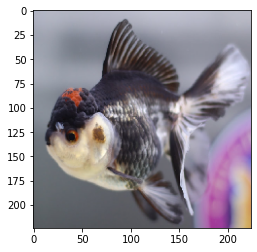

In [28]:
img = load_img(img_path,target_size=(size,size,3))
plt.imshow(img)

In [29]:
img = img_to_array(img)

In [30]:
img = img/255.0

In [31]:
img = img.reshape(1,size,size,3)

In [32]:
img.shape

(1, 224, 224, 3)

In [33]:
model.predict(img)

array([[0.06460457]], dtype=float32)

In [35]:
from keras.models import load_model
models = load_model('GoldFish_Gender.h5')
def get_classes(data):
  prob = models.predict(data)[0][0]
  if prob<=0.5:
    return 'GoldFish Female', (1 - prob)*100
  else:
    return 'GoldFish Male', prob*100

In [36]:
get_classes(img)

('GoldFish Female', 93.53954344987869)

In [37]:
def get_prediction(img_path):
  img = load_img(img_path, target_size=(size, size, 3))
  plt.imshow(img)
  img = img_to_array(img)
  img = img/255.0
  img = img.reshape(1, size, size, 3)
  pred, prob = get_classes(img)
  return pred, prob

('GoldFish Male', 72.56168127059937)

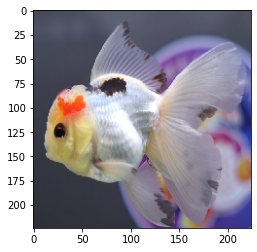

In [38]:
get_prediction('/content/gdrive/MyDrive/dataset_male_female/GoldFish/Male/Screenshot 2022-09-24 121342.png')